Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading the datasets

In [2]:
dataset=pd.read_csv('agg_match_stats_4.csv')
dataset_1=dataset[dataset['party_size']==1]
dataset_1=dataset_1[dataset_1['game_size']>=95]
df=pd.read_csv('train_V2.csv')
df_1=df[df['matchType']=='solo']
squad_matches = df[df['matchType'] == 'squad']

Dropping columns which are not necessary

In [5]:
dataset_1=dataset_1.drop(['match_id','match_mode','party_size','player_assists','player_dbno','team_id'],axis=1)

Analyzing Survival Time vs Placement Position

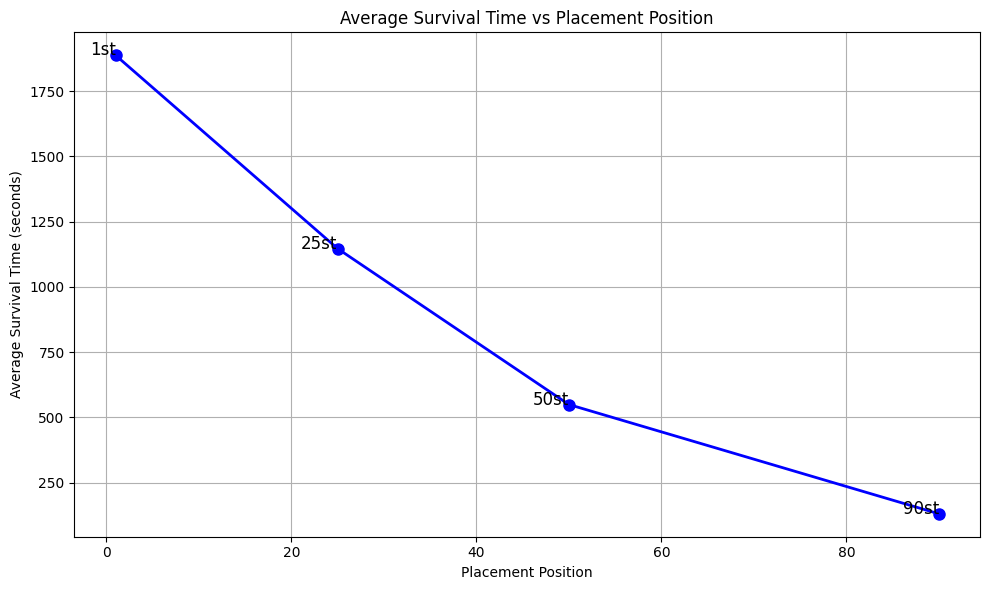

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_survival_time(dataset_1):
    # key positions we want to examine
    positions = [1, 25, 50, 90]
    

    average_survival_times = []
    
    for position in positions:
        avg_survival_time = dataset_1[dataset_1['team_placement'] == position]['player_survive_time'].mean()
        average_survival_times.append(avg_survival_time)
    
    plt.figure(figsize=(10, 6))
    plt.plot(positions, average_survival_times, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
    
    plt.title('Average Survival Time vs Placement Position')
    plt.xlabel('Placement Position')
    plt.ylabel('Average Survival Time (seconds)')
    

    for i, position in enumerate(positions):
        plt.text(position, average_survival_times[i], f"{position}st", fontsize=12, ha='right', color='black')
    

    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_average_survival_time(dataset_1)


How are Walking and Riding distances affecting the no of Kills done 


/var/folders/vc/9yhkn12j5h91vkyhz6hgcbc80000gp/T/ipykernel_88413/1634413188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['walkDistance_binned'] = pd.cut(df_1['walkDistance'], bins=walk_bins, labels=[f"{i}-{i+500}" for i in walk_bins[:-1]])
/var/folders/vc/9yhkn12j5h91vkyhz6hgcbc80000gp/T/ipykernel_88413/1634413188.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['rideDistance_binned'] = pd.cut(df_1['rideDistance'], bins=ride_bins, labels=[f"{i}-{i+500}" for i in ride_bins[:-1]])
/var/f

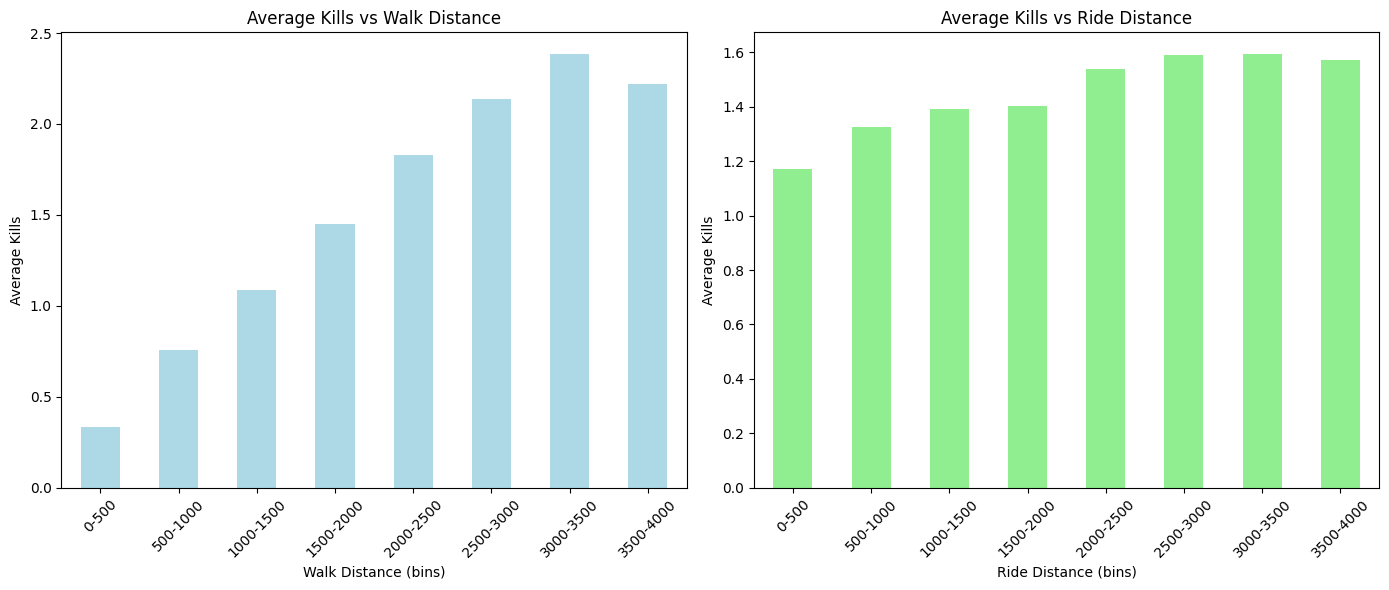

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_kills_with_distance(df_1):

    walk_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
    ride_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]


    df_1['walkDistance_binned'] = pd.cut(df_1['walkDistance'], bins=walk_bins, labels=[f"{i}-{i+500}" for i in walk_bins[:-1]])
    df_1['rideDistance_binned'] = pd.cut(df_1['rideDistance'], bins=ride_bins, labels=[f"{i}-{i+500}" for i in ride_bins[:-1]])


    avg_kills_walk = df_1.groupby('walkDistance_binned')['kills'].mean()
    avg_kills_ride = df_1.groupby('rideDistance_binned')['kills'].mean()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    avg_kills_walk.plot(kind='bar', color='lightblue')
    plt.title('Average Kills vs Walk Distance')
    plt.xlabel('Walk Distance (bins)')
    plt.ylabel('Average Kills')
    plt.xticks(rotation=45)


    plt.subplot(1, 2, 2)
    avg_kills_ride.plot(kind='bar', color='lightgreen')
    plt.title('Average Kills vs Ride Distance')
    plt.xlabel('Ride Distance (bins)')
    plt.ylabel('Average Kills')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


compare_kills_with_distance(df_1)


How do Top 5 Players prefer moving?


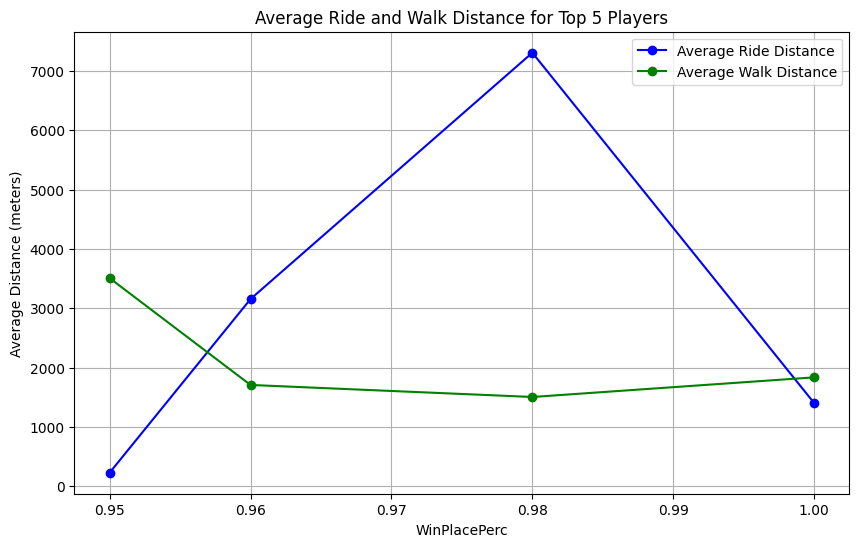

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_top_5_players(df_1):
    
    winPlacePerc_values = [0.95, 0.96, 0.97, 0.98, 0.99, 1]
    top_5_players = df_1[df_1['winPlacePerc'].isin(winPlacePerc_values)]

    summary_stats_ride = top_5_players.groupby('winPlacePerc')['rideDistance'].agg(['min', 'max', 'mean'])
    summary_stats_walk = top_5_players.groupby('winPlacePerc')['walkDistance'].agg(['min', 'max', 'mean'])



    plt.figure(figsize=(10, 6))
    plt.plot(summary_stats_ride['mean'], label='Average Ride Distance', marker='o', color='b')
    plt.plot(summary_stats_walk['mean'], label='Average Walk Distance', marker='o', color='g')
    plt.title('Average Ride and Walk Distance for Top 5 Players')
    plt.xlabel('WinPlacePerc')
    plt.ylabel('Average Distance (meters)')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_top_5_players(df_1)


A Special Case!!

Average player_dist_ride and player_dist_walk comparison:
1 Kill and Team Placement = 1:
  Average Ride Distance: 2514.65 meters
  Average Walk Distance: 2498.29 meters

More than 3 Kills:
  Average Ride Distance: 1452.66 meters
  Average Walk Distance: 2275.33 meters

More than 6 Kills:
  Average Ride Distance: 1654.51 meters
  Average Walk Distance: 2523.15 meters


<Figure size 1200x600 with 0 Axes>

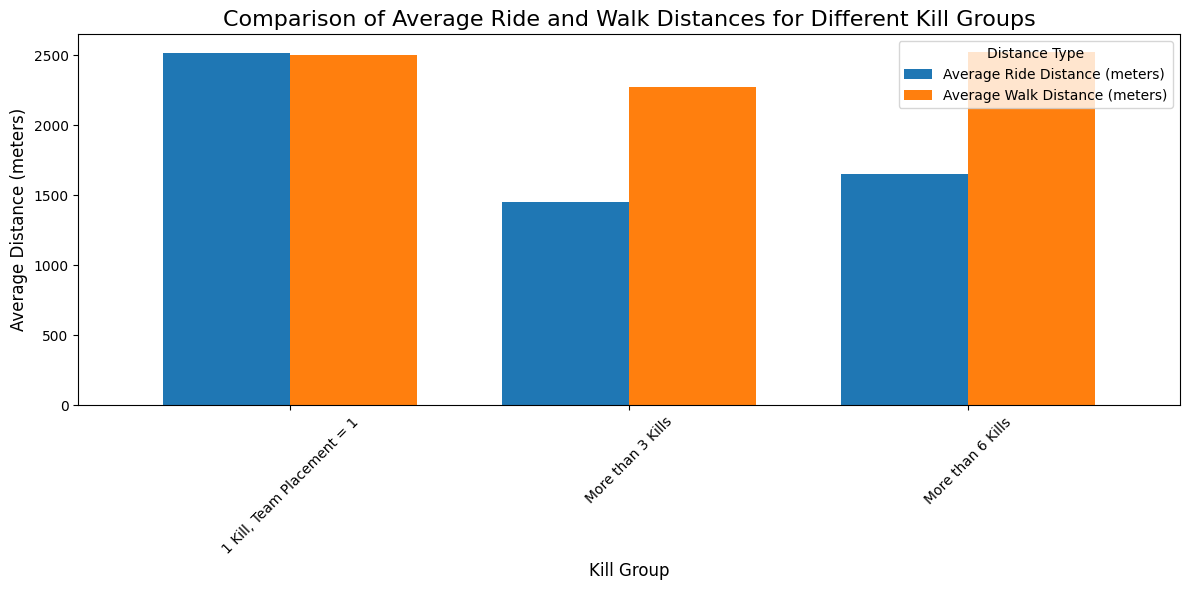

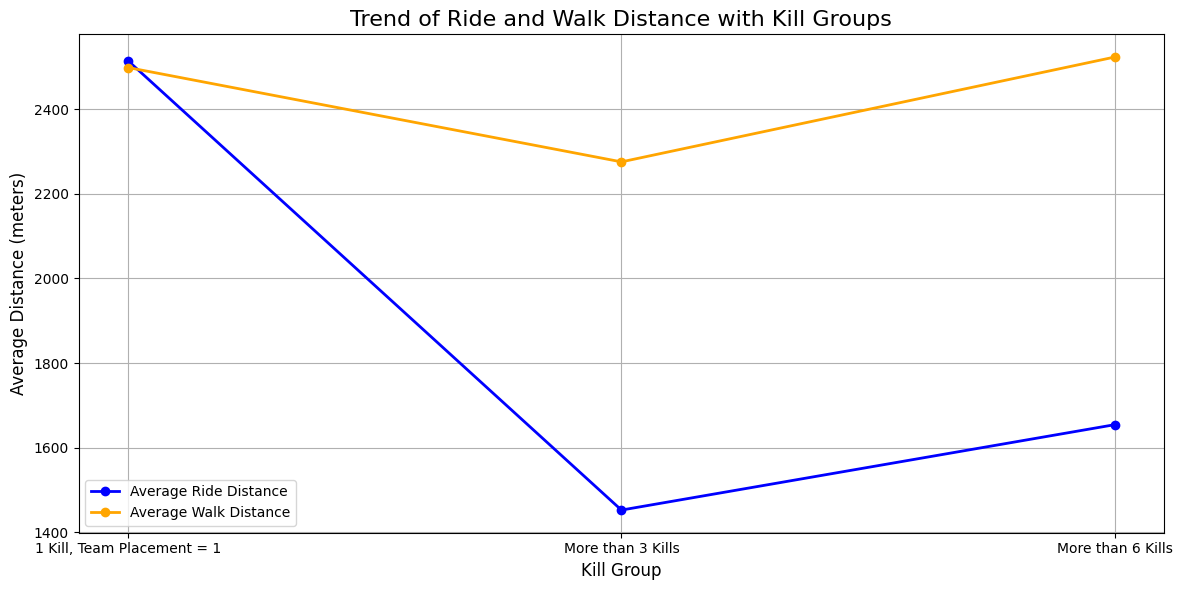

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


filtered_data_1_kill_and_win = df_1[(df_1['kills'] == 1) & (df_1['winPlacePerc'] == 1)]


filtered_data_more_than_3_kills = df_1[df_1['kills'] > 3]
filtered_data_more_than_6_kills=df_1[df_1['kills']>=6]

avg_dist_ride_1_kill_and_win = filtered_data_1_kill_and_win['rideDistance'].mean()
avg_dist_walk_1_kill_and_win = filtered_data_1_kill_and_win['walkDistance'].mean()


avg_dist_ride_more_than_3_kills = filtered_data_more_than_3_kills['rideDistance'].mean()
avg_dist_walk_more_than_3_kills = filtered_data_more_than_3_kills['walkDistance'].mean()

avg_dist_ride_more_than_6_kills = filtered_data_more_than_6_kills['rideDistance'].mean()
avg_dist_walk_more_than_6_kills = filtered_data_more_than_6_kills['walkDistance'].mean()


print("Average player_dist_ride and player_dist_walk comparison:")
print(f"1 Kill and Team Placement = 1:")
print(f"  Average Ride Distance: {avg_dist_ride_1_kill_and_win:.2f} meters")
print(f"  Average Walk Distance: {avg_dist_walk_1_kill_and_win:.2f} meters")

print(f"\nMore than 3 Kills:")
print(f"  Average Ride Distance: {avg_dist_ride_more_than_3_kills:.2f} meters")
print(f"  Average Walk Distance: {avg_dist_walk_more_than_3_kills:.2f} meters")

print(f"\nMore than 6 Kills:")
print(f"  Average Ride Distance: {avg_dist_ride_more_than_6_kills:.2f} meters")
print(f"  Average Walk Distance: {avg_dist_walk_more_than_6_kills:.2f} meters")
def plot_comparison_of_distances():

    data = {
        'Group': ['1 Kill, Team Placement = 1', 'More than 3 Kills', 'More than 6 Kills'],
        'Average Ride Distance (meters)': [
            avg_dist_ride_1_kill_and_win,
            avg_dist_ride_more_than_3_kills,
            avg_dist_ride_more_than_6_kills
        ],
        'Average Walk Distance (meters)': [
            avg_dist_walk_1_kill_and_win,
            avg_dist_walk_more_than_3_kills,
            avg_dist_walk_more_than_6_kills
        ]
    }
    
    df = pd.DataFrame(data)
    

    plt.figure(figsize=(12, 6))

    df.set_index('Group')[['Average Ride Distance (meters)', 'Average Walk Distance (meters)']].plot(kind='bar', 
                                                                                                      color=['#1f77b4', '#ff7f0e'], 
                                                                                                      figsize=(12, 6), 
                                                                                                      width=0.75)
    
    plt.title('Comparison of Average Ride and Walk Distances for Different Kill Groups', fontsize=16)
    plt.xlabel('Kill Group', fontsize=12)
    plt.ylabel('Average Distance (meters)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Distance Type')
    plt.show()
    
    plt.figure(figsize=(12, 6))

    plt.plot(df['Group'], df['Average Ride Distance (meters)'], marker='o', label='Average Ride Distance', color='b', linewidth=2)
    plt.plot(df['Group'], df['Average Walk Distance (meters)'], marker='o', label='Average Walk Distance', color='orange', linewidth=2)
    
    plt.title('Trend of Ride and Walk Distance with Kill Groups', fontsize=16)
    plt.xlabel('Kill Group', fontsize=12)
    plt.ylabel('Average Distance (meters)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_comparison_of_distances()


Optimum number of Kills done by Players to Win a PUBG Game

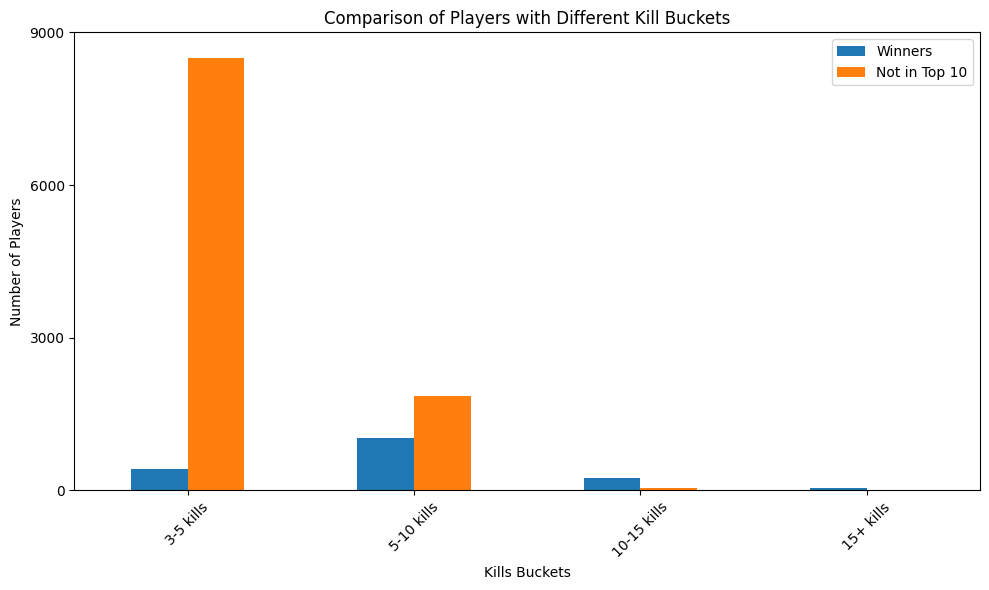

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def count_results_in_buckets(df_1):
    buckets = [(3, 5), (5, 10), (10, 15), (15, float('inf'))]
    bucket_labels = ['3-5 kills', '5-10 kills', '10-15 kills', '15+ kills']
    

    winner_counts = []
    not_in_top_10_counts = []

    for (min_kills, max_kills), label in zip(buckets, bucket_labels):

        players_filtered = df_1[(df_1['kills'] >= min_kills) & (df_1['kills'] < max_kills)]
        

        winners = players_filtered[players_filtered['winPlacePerc'] == 1]

        not_in_top_10 = players_filtered[players_filtered['winPlacePerc'] < 0.90]
        

        winner_counts.append(len(winners))
        not_in_top_10_counts.append(len(not_in_top_10))

    results_df = pd.DataFrame({
        'Kills Bucket': bucket_labels,
        'Winners': winner_counts,
        'Not in Top 10': not_in_top_10_counts
    })
    
    ax = results_df.set_index('Kills Bucket').plot(kind='bar', stacked=False, figsize=(10, 6))
    
    plt.title('Comparison of Players with Different Kill Buckets')
    plt.ylabel('Number of Players')
    plt.xlabel('Kills Buckets')
    plt.xticks(rotation=45)

    plt.yticks(range(0, max(max(winner_counts), max(not_in_top_10_counts)) + 3000, 3000))
    

    plt.tight_layout()
    

    plt.show()

count_results_in_buckets(df_1)


Heals and Weapons Acquired affecting the Placement Position

/var/folders/vc/9yhkn12j5h91vkyhz6hgcbc80000gp/T/ipykernel_88413/824365772.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['winPlacePerc_binned'] = pd.cut(df_1['winPlacePerc'], bins=winPlacePerc_bins, labels=winPlacePerc_labels, right=False)
/var/folders/vc/9yhkn12j5h91vkyhz6hgcbc80000gp/T/ipykernel_88413/824365772.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_heals_by_winPlacePerc = df_1.groupby('winPlacePerc_binned')['heals'].mean().reset_index()
/var/folders/vc/9yhkn12j5h91vkyhz6hgcbc80000gp/T/ipykernel_88413/824365772.py:16: FutureWa

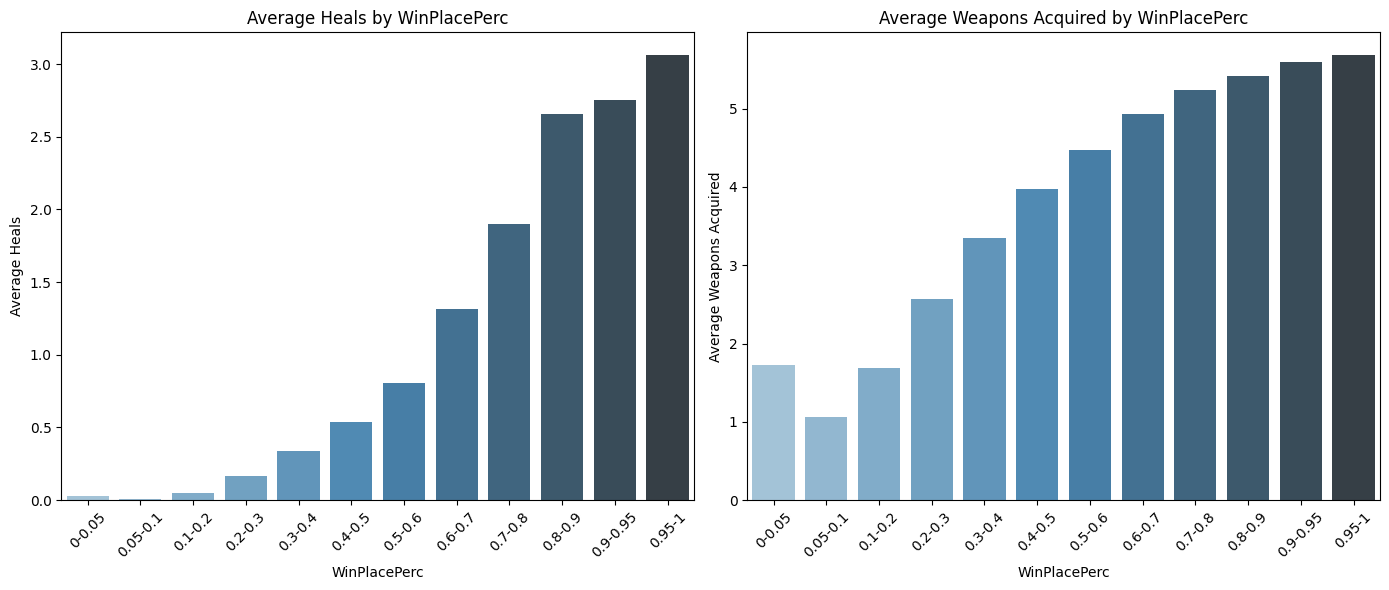

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_avg_heals_and_weapons_by_winPlacePerc(df_1):

    winPlacePerc_bins = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1]
    winPlacePerc_labels = ['0-0.05', '0.05-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', 
                           '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-0.95', '0.95-1']

    df_1['winPlacePerc_binned'] = pd.cut(df_1['winPlacePerc'], bins=winPlacePerc_bins, labels=winPlacePerc_labels, right=False)


    avg_heals_by_winPlacePerc = df_1.groupby('winPlacePerc_binned')['heals'].mean().reset_index()
    avg_weapons_by_winPlacePerc = df_1.groupby('winPlacePerc_binned')['weaponsAcquired'].mean().reset_index()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='winPlacePerc_binned', y='heals', data=avg_heals_by_winPlacePerc, palette='Blues_d')
    plt.title('Average Heals by WinPlacePerc')
    plt.xlabel('WinPlacePerc')
    plt.ylabel('Average Heals')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.barplot(x='winPlacePerc_binned', y='weaponsAcquired', data=avg_weapons_by_winPlacePerc, palette='Blues_d')
    plt.title('Average Weapons Acquired by WinPlacePerc')
    plt.xlabel('WinPlacePerc')
    plt.ylabel('Average Weapons Acquired')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


plot_avg_heals_and_weapons_by_winPlacePerc(df_1)


What do Team Players do Better than the rest!!

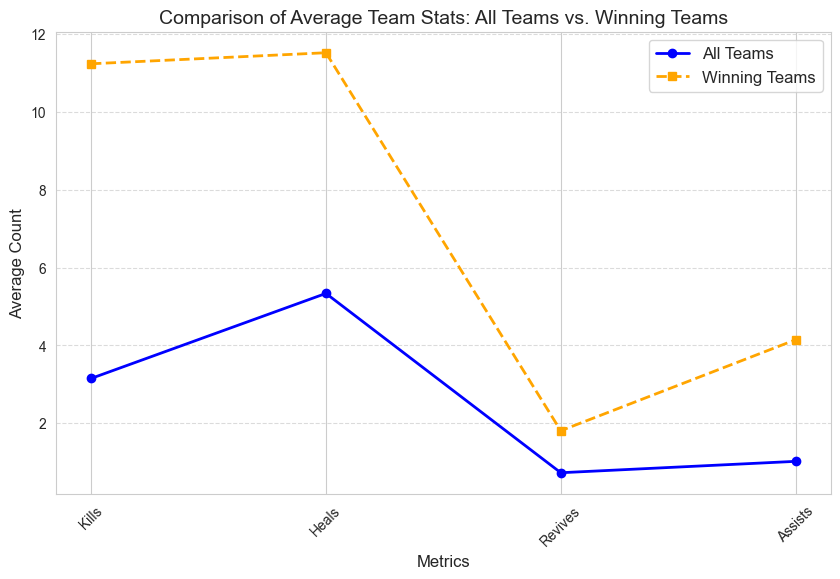

    Metric  All Teams  Winning Teams
0    Kills   3.153959      11.232502
1    Heals   5.337062      11.516221
2  Revives   0.733330       1.811505
3  Assists   1.025661       4.147792


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_teamwise_averages(squad_matches):

    all_teams_stats = squad_matches.groupby('groupId').agg({
        'kills': 'sum', 
        'heals': 'sum', 
        'revives': 'sum', 
        'assists': 'sum'
    }).reset_index()


    avg_all_teams = all_teams_stats.mean(numeric_only=True)

    winners_df = squad_matches[squad_matches['winPlacePerc'] == 1]

    winning_teams_stats = winners_df.groupby('groupId').agg({
        'kills': 'sum', 
        'heals': 'sum', 
        'revives': 'sum', 
        'assists': 'sum'
    }).reset_index()

    avg_winning_teams = winning_teams_stats.mean(numeric_only=True)


    comparison_df = pd.DataFrame({
        'Metric': ['Kills', 'Heals', 'Revives', 'Assists'],
        'All Teams': avg_all_teams.values,
        'Winning Teams': avg_winning_teams.values
    })

 
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    plt.plot(comparison_df['Metric'], comparison_df['All Teams'], marker='o', linestyle='-', color='blue', label='All Teams', linewidth=2)
    plt.plot(comparison_df['Metric'], comparison_df['Winning Teams'], marker='s', linestyle='--', color='orange', label='Winning Teams', linewidth=2)

    plt.title('Comparison of Average Team Stats: All Teams vs. Winning Teams', fontsize=14)
    plt.ylabel('Average Count', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.show()

    return comparison_df

comparison_stats = calculate_teamwise_averages(squad_matches)
print(comparison_stats)
